In [2]:
import pandas as pd
import numpy as np
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Load the dataset

adult = fetch_ucirepo(id=2)
data = adult.data.original

# Handle missing values
data = data.replace('?', np.nan)   # Replace "?" with NaN
#data.dropna(inplace=True)

# Split features and labels
X = data.drop("income", axis=1)
y = (data["income"] == ">50K").astype(int)

# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(16, activation="relu", input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(8, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8214 - loss: 0.4562 - val_accuracy: 0.8398 - val_loss: 0.3182
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8409 - loss: 0.3356 - val_accuracy: 0.8425 - val_loss: 0.3120
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8464 - loss: 0.3240 - val_accuracy: 0.8440 - val_loss: 0.3102
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8449 - loss: 0.3229 - val_accuracy: 0.8402 - val_loss: 0.3097
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3207 - val_accuracy: 0.8430 - val_loss: 0.3087
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.3154 - val_accuracy: 0.8470 - val_loss: 0.3083
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8504 - loss: 0.3111 - val_accuracy: 0.8459 - val_loss: 0.3075
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3145 - val_accuracy: 0.

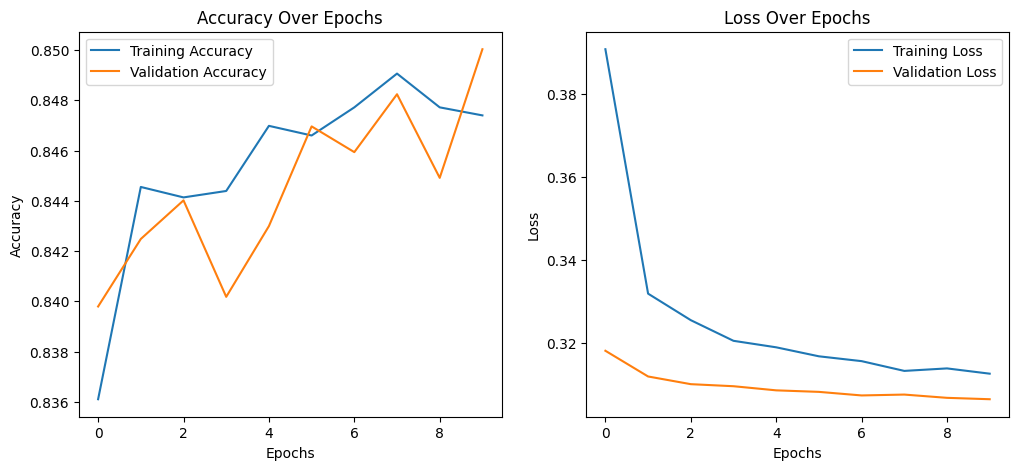

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [4]:
#model.save("model.h5")


In [5]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8474 - loss: 0.3156 - val_accuracy: 0.8512 - val_loss: 0.3064
Epoch 2/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3097 - val_accuracy: 0.8490 - val_loss: 0.3078
Epoch 3/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8499 - loss: 0.3065 - val_accuracy: 0.8461 - val_loss: 0.3067
Epoch 4/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.3121 - val_accuracy: 0.8545 - val_loss: 0.3057
Epoch 5/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8505 - loss: 0.3049 - val_accuracy: 0.8505 - val_loss: 0.3063
Epoch 6/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3134 - val_accuracy: 0.8549 - val_loss: 0.3056
Epoch 7/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8524 - loss: 0.3080 - val_accuracy: 0.8509 - val_loss: 0.3062
Epoch 8/20
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.3103 - val_accuracy: 0.

In [11]:
# Find optimal parameters

"""
!pip install keras_tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='tuning_example'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best units for layer 1: {best_hps.get('units_1')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")
"""


'\n!pip install keras_tuner\nimport keras_tuner as kt\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\n\ndef build_model(hp):\n    model = Sequential()\n    model.add(Dense(hp.Int(\'units_1\', min_value=32, max_value=128, step=32),\n                    activation=\'relu\', input_dim=X_train.shape[1]))\n    model.add(Dropout(0.3))\n    model.add(Dense(hp.Int(\'units_2\', min_value=16, max_value=64, step=16), activation=\'relu\'))\n    model.add(Dropout(0.3))\n    model.add(Dense(1, activation=\'sigmoid\'))\n    model.compile(optimizer=hp.Choice(\'optimizer\', [\'adam\', \'sgd\']),\n                  loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\ntuner = kt.RandomSearch(\n    build_model,\n    objective=\'val_accuracy\',\n    max_trials=5,\n    executions_per_trial=3,\n    directory=\'my_dir\',\n    project_name=\'tuning_example\'\n)\n\ntuner.search(X_train, y_train, epochs=10, validation_split=0.2)\nbest_hps

306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


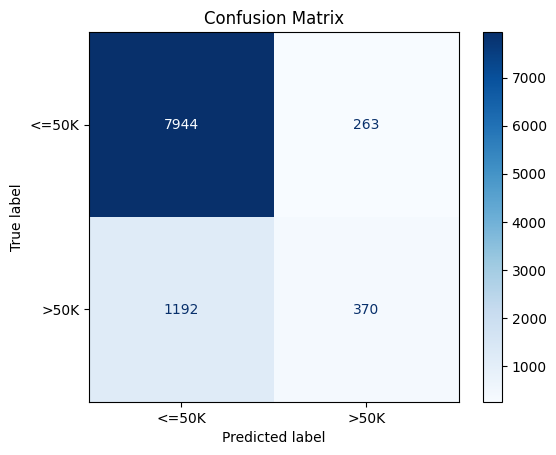

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap=plt.cm.Blues)

# Customize the plot
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["<=50K", ">50K"])
print("Classification Report:\n")
print(report)


306/306 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report:

              precision    recall  f1-score   support

       <=50K       0.87      0.97      0.92      8207
        >50K       0.58      0.24      0.34      1562

    accuracy                           0.85      9769
   macro avg       0.73      0.60      0.63      9769
weighted avg       0.82      0.85      0.82      9769

